# Lab 6

Name:

Date: 

**As you work through the code below, respond to all in-line comments and questions.**

First,  switch to a GPU enable runtime environment.  Second, specify the path to the raw data.  This will be provided by the instructor.


In [ ]:
FISHY_URL=''
print(FISHY_URL)

https://lea.rning.dev/resources/folds-w-meta.pkl


The data set is quite large.  So execute this cell only once to save bandwidth.  

In [ ]:
!mkdir /opt/lab6-storage

!wget $FISHY_URL --no-check-certificate \
    -O /opt/lab6-storage/folds-w-meta.pkl

--2020-09-29 23:30:34--  https://lea.rning.dev/resources/folds-w-meta.pkl
Resolving lea.rning.dev (lea.rning.dev)... 161.35.59.143
Connecting to lea.rning.dev (lea.rning.dev)|161.35.59.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 946285797 (902M)
Saving to: ‘/opt/lab6-storage/folds-w-meta.pkl’

/opt/lab6-storage/f 100%[===================>] 902.45M  14.0MB/s    in 68s     

2020-09-29 23:31:43 (13.3 MB/s) - ‘/opt/lab6-storage/folds-w-meta.pkl’ saved [946285797/946285797]



In [ ]:
!ls -al /opt/lab6-storage/folds-w-meta.pkl


-rw-r--r-- 1 root root 946285797 Sep 29 17:25 /opt/lab6-storage/folds-w-meta.pkl


In [ ]:
# Load 

import numpy as np
import sys
import pickle

with open('/opt/lab6-storage/folds-w-meta.pkl', "rb") as f:
        pd_folds = pickle.load(f, encoding='latin1')

train = {'data': pd_folds[0]['data'], 'class': pd_folds[0]['class'],
         'id': pd_folds[0]['id'], 'source': pd_folds[0]['source'],
         'length': pd_folds[0]['length'], 'girth': pd_folds[0]['girth'], 'weight': pd_folds[0]['weight']}


val = {'data': pd_folds[9]['data'], 'class': pd_folds[9]['class'],
         'id': pd_folds[9]['id'], 'source': pd_folds[9]['source'],
         'length': pd_folds[9]['length'], 'girth': pd_folds[9]['girth'], 'weight': pd_folds[9]['weight']}

for fold in pd_folds[1:8]:
    train['data'] = np.concatenate((train['data'], fold['data']))
    train['class'].extend(fold['class'])
    train['id'].extend(fold['id'])
    train['source'].extend(fold['source'])
    train['length'].extend(fold['length'])
    train['girth'].extend(fold['girth'])
    train['weight'].extend(fold['weight'])

species = set(train['class'])
class_map = dict(zip(species, range(len(species))))

train_X = train['data'].reshape((-1, 75, 200, 3))
train_Y = np.array([class_map[species] for species in np.repeat(train['class'], 9)], dtype=np.float32)
#train_Y = np.array(np.repeat(train['length'], 9))

val_X = val['data'].reshape((-1, 75, 200, 3))
val_Y = np.array([class_map[species] for species in np.repeat(train['class'], 9)], dtype=np.float32)
#val_Y = np.array(np.repeat(val['length'], 9))

# Check the distribution the targets


Visualize the a few images.

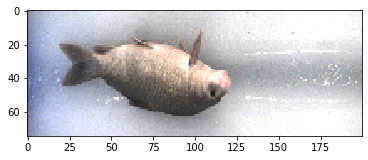

In [ ]:
from matplotlib.pyplot import imshow
%matplotlib inline

imshow(train['data'][11,:], interpolation='nearest')

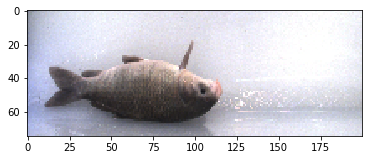

In [ ]:
from matplotlib.pyplot import imshow
%matplotlib inline

imshow(train['data'][10,:], interpolation='nearest')

Train up some models.

In [ ]:
# Model here ...

What was the best performance you were able to achieve?  What did you try?

**Submission:** Submit this notebook and a PDF of its generated output via Blackboard by the end of the day.  Submit the files individually.


